Projet numérique : Calcul différentiel
==============================

**Quelques modules et fonctions utiles**

In [1]:
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
def grad(f):
    """
        renvoie la fonction (x, y) -> grad(f)(x, y)
    """
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [3]:
def J(f):
    """
        renvoie la fonction (x, y) -> J(f)(x, y)
    """
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [5]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0*x1*x1 - 2.0*x1*x2 + 3.0*x2*x2

In [6]:
def f2(x1, x2):
    return (x1-1)**2 + (x1-x2**2)**2

In [7]:
def f3(x, y):
    return np.sin(x+y) - np.cos(x*y) - 1 + 0.001*(x*x + y*y) 

**Cellules de tests et validations graphiques**

Dans tout le notebook, toutes les validations graphiques sont effectuées dans des "cellules de test". Nous avons chaque fois écrit des fonctions d'affichage, qui permettent de modifier des paramètres, et en particulier, la fonction exemple utilisée.

**Question 1**

Soit $C_{f,c}$ la courbe de niveau de $f$ associée à $c$.
Montrons que $C_{f,c}$ est un compact de $\mathbb{R}^{2}$.
* $C_{f,c}=f^{-1}(\{c\})$ et $\{c\}$ est fermé et $f$ continue. Donc $C_{f,c}$ est fermé de $\mathbb{R}^{2}$.
* $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$ donc $\exists A\in\mathbb{R}^{+}$, $\forall (x_1,x_2)\in\mathbb{R}^{2}$, $\|(x_1,x_2)\|>A \Rightarrow f(x_1, x_2)>c+1$.
Ainsi, $C_{f,c}\subset B(0,A)$, donc $C_{f,c}$ est borné.

$C_{f,c}$ étant fermé et borné dans $\mathbb{R}^{2}$ de dimension finie, **$C_{f,c}$ est donc compact**.

*Remarque :*
On peut également montrer que $f(\mathbb{R}^{2})$ est un intervalle non majoré, ce qui amène :
$$\forall c\in\mathbb{R}\textrm{ tel que }C_{f,c}\neq\emptyset,d>c \Rightarrow C_{f,d}\neq\emptyset$$
où $C_{f,c}$ et $C_{f,d}$ sont définis comme ci-dessus.

En effet, $\mathbb{R}^{2}$ est un connexe par arc et $f$ une fonction continue donc $f(\mathbb{R}^{2})$ est connexe par arc dans $\mathbb{R}$, donc un intervalle, non majoré d'après l'hypothèse. Donc si $c\in\mathbb{R}\textrm{ est tel que }C_{f,c}\neq\emptyset$, pour tout $d>c$, $d\in f(\mathbb{R}^{2})$ donc $C_{f,d}\neq\emptyset$

**Question 2**

La tangente à la courbe de niveau de $f$ en $x_0$ admet pour équation :
$$\frac{\partial{f}}{\partial x_{1}}(x_0)(x_1-x_{10})+\frac{\partial{f}}{\partial x_{2}}(x_{0})(x_{2}-x_{20})=0$$
D'où un vecteur directeur (toutes les coordonnées sont exprimées dans la base canonique de $\mathbb{R}^{2}$), après normalisation :
$$\overrightarrow{u}=\frac{1}{\|\nabla f(x_0)\|}({-\frac{\partial{f}}{\partial x_{2}}(x_{0}),\frac{\partial{f}}{\partial x_{1}}(x_{0})})$$

Soit un point $A$ de coordonnées $(x_1,y_1)$. Le vecteur $\overrightarrow{x_{0}A}$ admet alors pour coordonnées : $(x_1-x_{10},x_2-x_{20})$

La projection de $\overrightarrow{x_{0}A}$ sur la tangente à la courbe de niveau en $x_0$ admet alors pour expression : $$p(x_1, x_2) = \langle\overrightarrow{x_{0}A},\overrightarrow{u}\rangle = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$
Donc, pour un point de $A(x_1,x_2)$, $p(x_1, x_2)$ représente la projection du vecteur $\overrightarrow{x_{0}A}$ sur la tangente à la courbe de niveau de $f$ en $x_0$.

De manière moins formelle, pour un écart à la position $x_0$, $p$ donne la portion du déplacement qui est selon la tangente à la courbe de niveau de f en $x_0$.

**Question 3**

Soit $U\subset\mathbb{R}^{2}$ un voisinage de $x_0$ tel que $\nabla f$ ne s'annule pas.
Définissons la fonction $g : U\times\mathbb{R}\rightarrow\mathbb{R}^{2}$ de la façon suivante :
$$g : ((x_1,x_2),t) \mapsto (f(x_1,x_2)-c,p(x_1,x_2)-t)$$
On a alors : $$g((x_1,x_2),t)=0\Leftrightarrow \left\{
    \begin{array}{ll}
        f(x_1,x_2)=c\\
        p(x_1,x_2)=t
    \end{array}
\right.$$
- $g$ est continûment différentiable : en effet, $f$ est $C^{1}$ et $p$ est $C^{1}$ car affine. D'après la différentiation composante par composante, $g$ est donc $C^{1}$
- Par la règle de différentiation composante par composante, on peut calculer la différentielle partielle de $g$ selon sa première coordonnée, $x=(x_1,x_2)$ en un point $y\in U\times\mathbb{R}$ :
$\partial_{x}g_{|y}=\begin{pmatrix} \partial_{x_1}f_{|y} & \partial_{x_2}f_{|y} \\ \partial_{x_1}p_{|y} & \partial_{x_2}p_{|y} \end{pmatrix}$
- $\partial_{x}g_{|y}$ est bien inversible en tout point de $\mathbb{R}^{2}$ : $det(\partial_{x}g_{|y})=\partial_{x_1}f_{|y}\cdot\partial_{x_2}p_{|y}-\partial_{x_1}p_{|y}\cdot\partial_{x_2}f_{|y}=-\frac{1}{\|\nabla f(x_0)\|}((\partial_{x_1}f_{|y})^{2}+(\partial_{x_2}f_{|y})^{2})=-\frac{\|\nabla f(y)\|^{2}}{\|\nabla f(x_0)\|}$
Or, par hypothèse, $\|\nabla f(y)\|$ est non nul sur U. Donc, $\partial_{x}g_{|y}$ est inversible.
- Enfin, $g((x_{10},x_{20}),t_0)=0$ avec $t_0=0$, car $p(x_{10}, x_{20})=0$.

On peut donc appliquer **le théorème des fonctions implicites** à la fonction $g$.

On en déduit l'existence de $\tilde U \subset U$ voisinage ouvert de $x_0$ et $V:=]-\varepsilon,\varepsilon[$ voisinage de $t_0=0$ et une unique fonction $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2,C^{1}$ tel que $\forall t\in V$, $\forall x=(x_1,x_2)\in \tilde U$ :
$$x=\gamma(t) \Leftrightarrow g(x,t)=0\Leftrightarrow \left\{
    \begin{array}{ll}
        f(x_1,x_2)=c\\
        p(x_1,x_2)=t
    \end{array}
\right.$$
$p(x_{10},x_{20})=0$ et $p$ continue. Soit donc un voisinage ouvert $W$ de $(x_{10},x_{20})$, tel que $p(W)\subset V$.

En considérant le voisinage $\tilde U \cap W$ (ouvert comme intersections d'ouverts) de $x_0$, on pose à bon droit $t := p(x_1, x_2)$, pour $(x_1,x_2)\in \tilde U \cap W$, et on a alors : $f(x_1,x_2) = c$ si et seulement si $(x_1, x_2) = \gamma(t)$.

**Question 4**

- Le théorème des fonctions implicites fournit également l'expression de la dérivée de $\gamma$. $\forall t \in V$ :
$$\gamma'(t)=-\begin{pmatrix} \partial_{x_1}f_{|\gamma(t)} & \partial_{x_2}f_{|\gamma(t)} \\ \partial_{x_1}p_{|t} & \partial_{x_2}p_{|t} \end{pmatrix}^{-1} \cdot \begin{pmatrix} 0 \\ -1\end{pmatrix}$$
D'où
$$\gamma'(t)=\frac{1}{-\partial_{x_1}f_{|\gamma(t)}^{2}-\partial_{x_2}f_{|\gamma(t)}^{2}}\begin{pmatrix} \partial_{x_2}f_{|\gamma(t)} \\ -\partial_{x_1}f_{|\gamma(t)}\end{pmatrix}=\|\nabla f(y)\|^{-2}\begin{pmatrix} \partial_{x_2}f_{|\gamma(t)} \\ -\partial_{x_1}f_{|\gamma(t)}\end{pmatrix}$$
Ainsi, $\gamma'(t)\neq0$, sinon $\|\nabla f(\gamma (t))\|=0$, ce qui est impossible car pour $t\in V$, $\gamma(t)\in \tilde U$.
- Montrons à présent l'orthogonalité de $\gamma'(t)$,et $\nabla f(\gamma(t))$ : $$\|\nabla f(\gamma(t))\|^{2}\cdot\gamma'(t)\cdot\nabla f(\gamma(t))=\begin{pmatrix} \partial_{x_2}f_{|\gamma(t)} \\ -\partial_{x_1}f_{|\gamma(t)}\end{pmatrix}\cdot\begin{pmatrix} \partial_{x_1}f_{|\gamma(t)} \\ -\partial_{x_2}f_{|\gamma(t)}\end{pmatrix}=0$$ Donc, $\forall t \in V$, $\gamma'(t)\perp\nabla f(\gamma(t))$.

**Question 5**

Comme la méthode de Newton est vouée à être utilisée pour tracer des courbes de niveau, la précision n'a pas besoin d'être très bonne. En effet, un écart très petit entre deux points (celui obtenu et celui théorique) ne pourra être distingué sur le graphe. Les données manipulées sont *a priori* de l'ordre de l'unité. Le $\epsilon$ choisi doit donc :
- être très inférieur à l'unité : $\epsilon \ll 1$
- être très supérieur au "epsilon machine" : $\epsilon\gg \epsilon_{machine}\approx10^{-16}$
On est alors tenté de choisir $\epsilon=10^{-8}$ (moyenne géométrique).

Toutefois, compte tenu des opérations effectuées qui suscitent un grand nombre d'arrondis, la méthode ne converge que rarement pour un tel $\epsilon$.

On propose donc de choisir la valeur $\epsilon \approx 10^{-3}$, qui respecte bien les deux conditions évoquées ci-dessus et produit de bons résultats.

**Tâche 1**

In [8]:
N = 100 #nombre d'itérations dans la méthode de Newton avant de considérer que l'algorithme ne converge pas
eps = 1e-03 #variation maximale tolérée pour arrêter la recherche

def Newton(F, x0, y0, eps=eps, N=N):
    """
        recherche un zéro de F à partir de (x0, y0) via la méthode de Newton,
        N le nombre d'itérations dans la méthode de Newton avant de considérer que l'algorithme ne converge pas,
        eps la variation maximale tolérée pour arrêter la recherche
    """
    dF = J(F)
    for i in range(N): #empêche de boucler infiniment en cas de non convergence
        X = np.array([x0, y0]) - np.linalg.inv(dF(x0, y0)).dot(F(x0, y0))
        x, y = X[0], X[1]
        #condition d'arrêt : si on ne se déplace plus beaucoup c'est qu'on est proche d'un zéro
        if np.sqrt((x-x0)**2 + (y-y0)**2) < eps:
            return x, y
        else:
            x0, y0 = x, y
            
    raise ValueError(f"no convergence in {N} steps.")

**Tâche 2**

In [9]:
#on va toujours chercher des points à l'intersection entre f^-1({c}) 
#et une droite mais en faisant varier l'inclinaison de cette droite 
#et en testant pour des points de départ choisis aléatoirement.

#version de Newton modifiée pour faire les tests

def Newton_test(f, x0, y0, c, theta, eps=eps, N=N):
    """
        recherche un point de l'intersection entre la courbe de niveau f^-1({c}) 
        et la droite d'angle polaire theta à partir de (x0, y0) via la méthode de Newton,
        N le nombre d'itérations dans la méthode de Newton avant de considérer que l'algorithme ne converge pas,
        eps la variation maximale tolérée pour arrêter la recherche
    """
    
    #définition de la fonction F: R^2 -> R^2 à laquelle on va pouvoir appliquer l'algorithme de Newton
    def F(x, y):
        return np.array([f(x, y) - c, np.sin(theta)*x - np.cos(theta)*y])
    
    #algorithme en tout point similaire à celui de la fonction Newton mais sans interuption en cas de non convergence
    dF = J(F)
    for i in range(N):
        X = np.array([x0, y0]) - np.linalg.inv(dF(x0, y0)).dot(F(x0, y0))
        x, y = X[0], X[1]
        if np.sqrt((x-x0)**2 + (y-y0)**2) < eps:
            return x, y
        else:
            x0, y0 = x, y

#imports et paramètres par défaut du test
from random import uniform

nb_droites = 100  #nombre de droites testées
nb_pts_par_dir = 5  #nombre de points initiaux testés pour chaque direction


def points_niveaux(f, c, eps=eps, N=N, nb_droite=nb_droites, nb_pts_par_dir=nb_pts_par_dir, xmin=-1, xmax=1, ymin=-1, ymax=1):
    """
        cherche des points à l'intersection entre f^-1({c}) 
        et une droite d'inclinaison theta variant entre 0 et pi
        et en testant pour nb_pts_par_dir points de départ choisis aléatoirement
    """
    #stockage des points trouvés (nombre initialement inconnu)
    liste_x = []
    liste_y = []
    #construction des angles des droites de balayage pour avoir des points sur toute la courbe de niveau
    theta = np.linspace(0, np.pi, nb_droites)
    #appels à Newton_test pour différentes inclinaisons et points de départ
    for i in range(nb_droite):
        for _ in range(nb_pts_par_dir):
            x0, y0 = uniform(xmin,xmax), uniform(ymin,ymax)
            p = Newton_test(f, x0, y0, c, theta[i], eps, N)
            #le type du résultat nous informe sur le succès ou non de la convergence
            if type(p) == tuple:
                liste_x.append(p[0])
                liste_y.append(p[1])
     
    return liste_x, liste_y

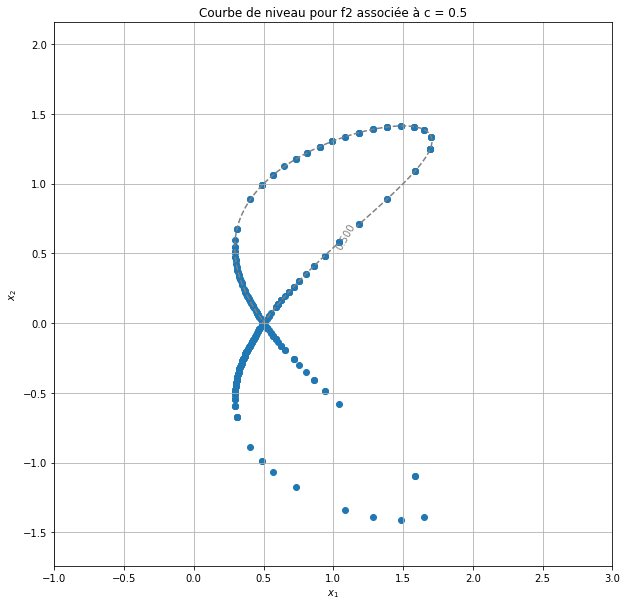

In [27]:
#Cellule de test
def affichage_T2(f, c, xmin, xmax, ymin, ymax):
    display_contour(f, x = np.linspace(xmin, xmax, 100), y = np.linspace(ymin, ymax, 100), levels = [c])
    x, y = points_niveaux(f, c, eps, N, nb_droites, nb_pts_par_dir, xmin, xmax, ymin, ymax)
    plt.scatter(x,y)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.axis("equal")
    plt.title(f"Courbe de niveau pour {f.__name__} associée à c = {c}")
    plt.show()

affichage_T2(f2, 0.5, -1, 3, 0, 2)

**Question 6 + tâche 3**

In [11]:
def level_curve(f, c, x0, y0, delta=0.1, nb_points=200, eps=eps):
    """
        trace la courbe de niveau f^-1({c}) en recherchant de proche en proche à partir de (x0, y0) 
        des points de cette courbe distants de delta les uns des autres via la méthode de Newton, 
        le parcours de la courbe se fait "vers la droite" quand on regarde dans le sens du gradient en un point. 
        Le point (x0, y0) doit être à une distance inférieure à delta de la courbe de niveau.
        nb_points le nombre de points tracés, eps la précision dans la méthode de Newton.
    """
    liste_x = []
    liste_y = []
    
    #algorithme de Newton analogue aux précédents
    def Newton_test2(F, x1, y1):
        dF = J(F)
        for i in range(N):
            X = np.array([x1, y1]) - np.linalg.inv(dF(x1, y1)).dot(F(x1, y1))
            x, y = X[0], X[1]
            if np.sqrt((x-x1)**2 + (y-y1)**2) < eps:
                return x, y
            else:
                x1, y1 = x, y

    for i in range(nb_points):
        #détermination du point de départ (avant décalage) pour la prochaine utilisation de la méthode de Newton
        #si on a déjà trouvé des points on peut prendre le dernier comme point de départ, 
        if liste_x: 
            x1 = liste_x[-1]
            y1 = liste_y[-1]            
        #sinon on prend le (x0, y0) passé en argument
        else:
            x1 = x0
            y1 = y0

        #définition de la fonction F: R^2 -> R^2 à laquelle on va pouvoir appliquer l'algorithme de Newton : 
        #zéros à l'intersection de la courbe de niveau et du cercle de centre le point précédent et de rayon delta
        def F(x, y):
            """
                fonction dont les zéros sont à 
                l'intersection de la courbe de niveau f^-1({c})
                et du cercle de centre (x1, y1) et de rayon delta
            """
            return np.array([f(x, y) - c, np.sqrt((x-x1)**2 + (y-y1)**2) - delta]) 
        
        #on décale un peu le point de départ parallèlement à la courbe de niveau "vers la droite"
        grad_f = grad(f)(x1, y1)
        norm_grad = np.linalg.norm(grad_f)
        #coordonnées d'un vecteur normal au gradient en (x1, y1) "à droite" normalisé
        dx, dy = delta*grad_f[1]/norm_grad, -delta*grad_f[0]/norm_grad
        
        #appel à Newton_test depuis un point décalé parallèlement à la courbe de niveau 
        #"vers la droite" afin que la méthode converge bien vers un point "à droite", si elle converge
        point = Newton_test2(F, x1+dx, y1+dy)
        #le type du résultat nous informe sur le succès ou non de la convergence
        if type(point) == tuple:
            liste_x.append(point[0])
            liste_y.append(point[1])
        else:
            print("le parcours de la courbe de niveau n'a pu être achevé, le tableau partiel des résulats est :")
            return np.array([liste_x, liste_y])
    
    return np.array([liste_x, liste_y])

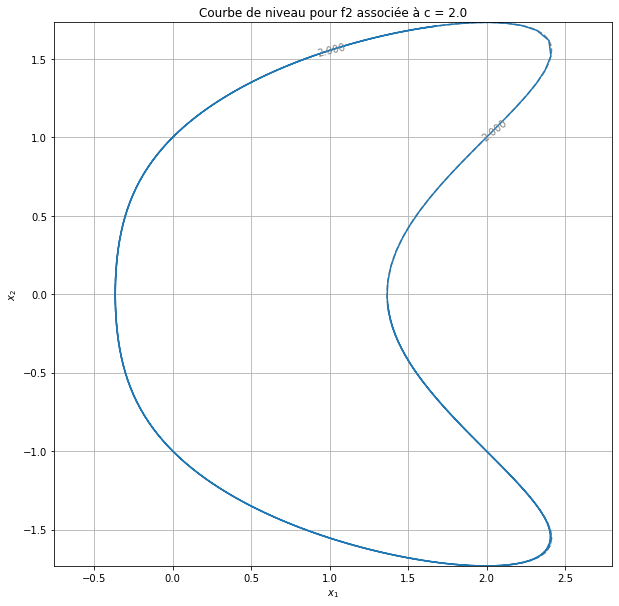

In [12]:
#Cellule de test
def affichage_T3(f, c, x0, y0):
    x, y = level_curve(f, c, x0, y0)
    xmin,xmax=np.min(x),np.max(x)
    ymin,ymax=np.min(y),np.max(y)
    display_contour(f, x = np.linspace(xmin, xmax, 100), y = np.linspace(ymin, ymax, 100), levels = [c])
    plt.plot(x, y)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.axis("equal")
    plt.title(f"Courbe de niveau pour {f.__name__} associée à c = {c}")
    plt.show()
    
affichage_T3(f2, 2., 1.3, 0.)

**Question 7 + tâche 4**

In [13]:
def recouvrement(segment, liste_segments, eps=1e-8):
    """
        les segments sont représentés par des tuples de deux points, 
        eux-mêmes étant représentés par des tuples de deux flottants, 
        renvoie true ssi il existe segment2 dans liste_segments intersectant segment,
        on suppose qu'aucun segment n'est réduit à un point
    """
    ((x0, y0), (x1, y1)) = segment
    vertical = False
    if x0==x1 : # segment vertical
        vertical = True
    else :
        alpha1 = (y1-y0) / (x1-x0) # coef dir droite passant par (x0, y0), (x1, y1)
        beta1 = y0 - alpha1*x0 # ordonnée origine droite passant par (x0, y0), (x1, y1)
    for ((x2, y2), (x3, y3)) in liste_segments[0:-1]:
        if x2==x3 : # segment vertical
            if not vertical :
                y_intersect = alpha1*x2+beta1
                return ((min(x0, x1) <= x2 <= max(x0, x1)) and (min(y0, y1) <= y_intersect <= max(y0, y1)) and (min(y2, y3) <= y_intersect <= max(y2, y3)))        
        else :
            alpha2 = (y3-y2) / (x3-x2) # coef dir droite passant par (x2, y2), (x3, y3)
            beta2 = y2 - alpha2*x2 # ordonnée origine droite passant par (x2, y2), (x3, y3)
            if abs(alpha1-alpha2) > eps:
                x_intersect = (beta2-beta1) / (alpha1-alpha2)
                y_intersect = alpha1*x_intersect + beta1
                if (min(y0, y1) <= y_intersect) and (max(y0, y1) >= y_intersect) and (min(y2, y3) <= y_intersect) and (max(y2, y3) >= y_intersect):
                    return True
    return False

In [14]:
def level_curve_sans_recouvrement(f, c, x0, y0, delta=0.1, nb_points=100, eps=eps):
    """
        analogue à level_curve mais avec un arrêt prématuré éventuel 
        si le dernier segment tracé coupe un segment tracé précédemment
    """
    liste_x = []
    liste_y = []
    segments = []
    
    def Newton_test2(F, x1, y1):
        
        dF = J(F)
        for i in range(N):
            X = np.array([x1, y1]) - np.linalg.inv(dF(x1, y1)).dot(F(x1, y1))
            x, y = X[0], X[1]
            if np.sqrt((x-x1)**2 + (y-y1)**2) <= eps:
                return x, y
            else:
                x1, y1 = x, y

    for i in range(nb_points):
        
        #détermination du point de départ pour la prochaine utilisation de la méthode de Newton
        if liste_x: #si on a déjà trouvé des points on peut prendre le dernier comme point de départ, 
                    #sinon on prend le (x0, y0) passé en argument
            x1 = liste_x[-1]
            y1 = liste_y[-1]            
        else:
            x1 = x0
            y1 = y0

        def F(x, y):
            #intersection de la courbe de niveau et du cercle de centre (x1, y1) et de rayon delta
            return np.array([f(x, y) - c, np.sqrt((x - x1)**2 + (y - y1)**2) - delta]) 
        
        #on décale un peu le point de départ parallèlement à la courbe de niveau "vers la droite"
        grad_f = grad(f)(x1, y1)
        norm_grad = np.linalg.norm(grad_f)
        #coordonnées d'un vecteur normal au gradient en (x1, y1) "à droite" normalisé
        dx, dy = delta*grad_f[1]/norm_grad, -delta*grad_f[0]/norm_grad

        point = Newton_test2(F, x1+dx, y1+dy)
        
        if type(point) == tuple:
            liste_x.append(point[0])
            liste_y.append(point[1])
            #SEULE DIFFERENCE AVEC level_curve : 
            #on ajoute le test de non recouvrement avant d'ajouter un point et continuer
            if not recouvrement(((x1, y1), point), segments): 
                segments.append(((x1, y1), point))
            else:
                #on rajoute le point du début pour fermer la boucle
                liste_x.append(liste_x[0])
                liste_y.append(liste_y[0])
                print("le parcours de la courbe de niveau s'est arrêté car on avait atteint un recouvrement")
                return np.array([liste_x, liste_y])
        else:
            print("le parcours de la courbe de niveau n'a pu être achevé, le tableau partiel des résulats est :")
            return np.array([liste_x, liste_y])
    
    return np.array([liste_x, liste_y])

Il est possible de simplifier (et d'accéléler) le test de recouvrement en se restreignant à vérifier l'intersection avec le premier segment à condition que la courbe de niveau de la fonction ne se coupe pas elle-même, i.e. ne soit pas "autointersectante".

De telles courbes existent, comme en atteste la fonction de Rosenbrock. Partant de cette fonction, et en modifiant légèrement les paramètres, on construit aisément d'autres fonctions vérifiant la même propriété. En cela, ces courbes de niveaux ne sont pas "rares".

Toutefois, dans les usages courants, des fonctions présentant cette propriété ne sont que rarement rencontrées et, parmi les niveaux de ces fonctions, rares sont ceux associés à l'autointersection.

**Il est donc intéressant d'implémenter cette version amméliorée de la fonction level_curve_sans_recouvrement (même si l'ammélioration sera minime car l'opération la plus lente est l'appel à Newton et non le test de recouvrement).**

In [15]:
def level_curve_sans_recouvrement_plus_rapide(f, c, x0, y0, delta=0.1, nb_points=100, eps=eps):
    """
        analogue à level_curve_sans_recouvrement mais en ne testant l'intersection qu'entre 
        le premier segment et le dernier tracé à chaque étape
    """
    liste_x = []
    liste_y = []
    segment_init = None
    
    def Newton_test2(F, x1, y1):
        
        dF = J(F)
        for i in range(N):
            X = np.array([x1, y1]) - np.linalg.inv(dF(x1, y1)).dot(F(x1, y1))
            x, y = X[0], X[1]
            if np.sqrt((x-x1)**2 + (y-y1)**2) <= eps:
                return x, y
            else:
                x1, y1 = x, y

    for i in range(nb_points):
        
        #détermination du point de départ (avant décalage) pour la prochaine utilisation de la méthode de Newton
        #si on a déjà trouvé des points on peut prendre le dernier comme point de départ, 
        #sinon on prend le (x0, y0) passé en argument
        if liste_x: 
            x1 = liste_x[-1]
            y1 = liste_y[-1]            
        else:
            x1 = x0
            y1 = y0

        def F(x, y):
            return np.array([f(x, y) - c, np.sqrt((x-x1)**2 + (y-y1)**2) - delta]) #intersection de la courbe de niveau 
                                                                                   #et du cercle de centre (x1, y1) 
                                                                                   #et de rayon delta
        
        #on décale un peu le point de départ parallèlement à la courbe de niveau "vers la droite"
        grad_f = grad(f)(x1, y1)
        norm_grad = np.linalg.norm(grad_f)
        dx, dy = delta*grad_f[1]/norm_grad, -1*delta*grad_f[0]/norm_grad #coordonnées d'un vecteur normal au gradient 
                                                                         #en (x1, y1) "à droite" normalisé

        point = Newton_test2(F, x1 + dx, y1 + dy)
        
        if type(point) == tuple:
            liste_x.append(point[0])
            liste_y.append(point[1])
            if not recouvrement(((x1, y1), point), [segment_init]) : 
                if len(liste_x) == 1:
                    segment_init = ((x1, y1), point)
            else:
                #on rajoute le point du début pour fermer la boucle
                liste_x.append(liste_x[0])
                liste_y.append(liste_y[0])
                print("le parcours de la courbe de niveau s'est arrêté car on avait atteint un recouvrement")
                return np.array([liste_x, liste_y])
        else:
            print("le parcours de la courbe de niveau n'a pu être achevé, le tableau partiel des résulats est :")
            return np.array([liste_x, liste_y])
    
    return np.array([liste_x, liste_y])

**Tâche 5**

le parcours de la courbe de niveau s'est arrêté car on avait atteint un recouvrement


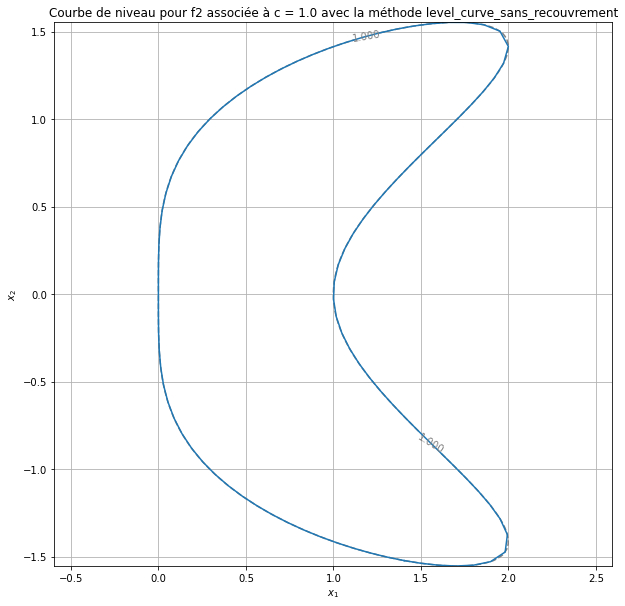

tracé en 0.662745475769043 secondes avec la méthode normale


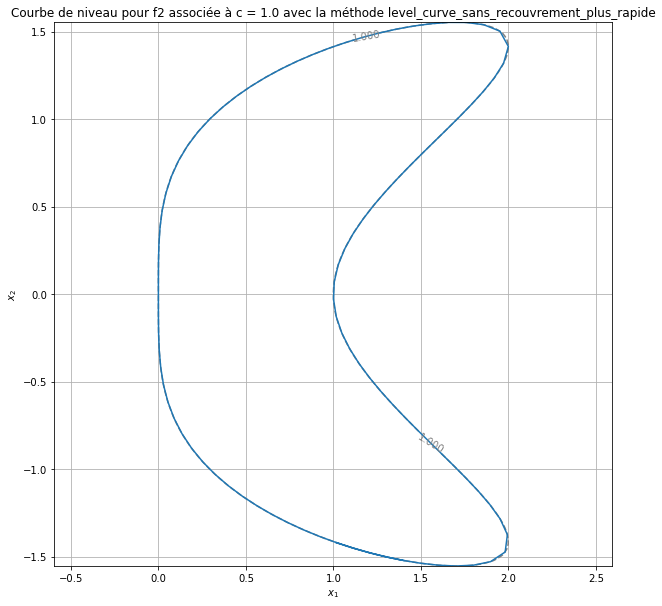

tracé en 0.686767578125 secondes avec la méthode un peu accéléré


In [16]:
def affichage_T5(methode, f, c, x0, y0):
    '''methode : level_curve_sans_recouvrement (defaut) ou level_curve_sans_recouvrement_plus_rapide'''
    x, y = methode(f2, c, x0, y0)
    xmin,xmax=np.min(x),np.max(x)
    ymin,ymax=np.min(y),np.max(y)
    display_contour(f, x = np.linspace(xmin, xmax, 100), y = np.linspace(ymin, ymax, 100), levels = [c])
    plt.plot(x,y)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.axis("equal")
    plt.title(f"Courbe de niveau pour {f.__name__} associée à c = {c} avec la méthode {methode.__name__}")
    plt.show()

#comparaison des durées d'exécutions des deux versions à l'aide du module time
import time

start_time = time.time()
affichage_T5(level_curve_sans_recouvrement, f2, 1., 1.5, -1.5)
print(f"tracé en {time.time() - start_time} secondes avec la méthode normale")

start_time = time.time()
affichage_T5(level_curve_sans_recouvrement_plus_rapide, f2, 1., 1.5, -1.5)
print(f"tracé en {time.time() - start_time} secondes avec la méthode un peu accéléré")

**Question 8**

Notons $P1=(x_1,y_1)$, $P2=(x_2,y_2)$, $u_1=(\alpha_1,\beta_1)$ et $u_2=(\alpha_2,\beta_2)$.

On peut légitimement rechercher une solution sous la forme $\gamma(t) = (x(t), y(t))$ où 
$x(t) = a + bt + ct^2 \; \mbox{ et } \; y(t) = d + et + ft^2$ car de telles fonctions polynômiales assureront la continue différentiabilité de $\gamma$. Les conditions d'interpolation deviennent alors :
$$
\gamma(0) = P_1 \Leftrightarrow \left\{
    \begin{array}{ll}
        a=x_1\\
        d=y_1
    \end{array}
\right.
$$
$$
\gamma(1) = P_2 \Leftrightarrow \left\{
    \begin{array}{ll}
        a+b+c=x_2\\
        d+e+f=y_2
    \end{array}
\right.
$$
On pose de plus comme condition : $\gamma'(0)=\xi u_1$ et $\gamma'(1)=\rho u_2$, avec $\xi>0$ et $\rho>0$ (C0) d'où
$$
\left\{
    \begin{array}{ll}
        \gamma'(0)=\xi u_1\\
        \gamma'(1)=\rho u_2
    \end{array}
\right. \Leftrightarrow \left\{
    \begin{array}{ll}
        b=\xi \alpha_1\\
        e=\xi \beta_1\\
        b+2c=\rho \alpha_2\\
        e+2f=\rho \beta_2
    \end{array}
\right.
$$
En remarquant que $b+2c=2(b+c)-b$ (resp. $e+2f=2(e+f)-e$), on obtient alors respectivement :
$$
\left\{
    \begin{array}{ll}
        \rho \alpha_2=2(x_2-x_1)-\xi\alpha_1\\
        \rho\beta_2=2(y_2-y_1)-\xi\beta_1
    \end{array}
\right.
$$

On suppose $\alpha_2\neq0$ (C1). D'où on tire de la première équation : $\rho=\frac{2(x_2-x_1)-\xi\alpha_1}{\alpha_2}$. Or, $\rho>0$ d'où $2(x_2-x_1)>\xi\alpha_1$ (C0). En combinant les deux équations :
$$
\xi(\alpha_2\beta_1-\beta_2\alpha_1)=2\alpha_2(y_2-y_1)-2\beta_2(x_2-x_1)
$$
Soit, en supposant $det(u_1,u_2)\neq0$ (C2),
$$
\xi=\frac{2\alpha_2(y_2-y_1)-2\beta_2(x_2-x_1)}{\alpha_2\beta_1-\beta_2\alpha_1}=\frac{2\beta_2(x_2-x_1)-2\alpha_2(y_2-y_1)}{det(u_1,u_2)}
$$
En réinjectant l'expression de $\xi$ dans les autres équations, on obtient finalement :
$$
\left\{
    \begin{array}{ll}
        a=x_1\\
        b=\xi\alpha_1=\alpha_1\frac{2\beta_2(x_2-x_1)-2\alpha_2(y_2-y_1)}{det(u_1,u_2)}\\
        c=x_2-x_1-b=x_2-x_1-\alpha_1\frac{2\beta_2(x_2-x_1)-2\alpha_2(y_2-y_1)}{det(u_1,u_2)}\\
        d=y_1\\
        e=\xi\beta_1=\beta_1\frac{2\beta_2(x_2-x_1)-2\alpha_2(y_2-y_1)}{det(u_1,u_2)}\\
        f=y_2-y_1-e=y_2-y_1-\beta_1\frac{2\beta_2(x_2-x_1)-2\alpha_2(y_2-y_1)}{det(u_1,u_2)}
    \end{array}
\right.
$$
*Récapitulatif des conditions à imposer :*

(C0) : $\xi,\rho>0$

(C1) : $\alpha_2\neq0$

(C2) : $det(u_1,u_2)\neq0$, c'est-à-dire, $u_1$ et $u_2$ non colinéaires

**Tâche 6**

In [17]:
eps = 1e-6
def gamma(t, P1, P2, u1, u2):
    """
        On représente les vecteurs par des tableaux,
        P1 (resp. P2) le point initial (resp. final)
        et u1 (resp. u2) le vecteur tangent à la courbe 
        interpolée en ce point. renvoie un tableau de points
        intermédiaires entre P1 et P2 suivant une interpolation
        quadratique, lorsque celle-ci est possible, linéaire sinon
    """
    x1, y1 = P1[0], P1[1]
    x2, y2 = P2[0], P2[1]
    a1, b1 = u1[0], u1[1]
    a2, b2 = u2[0], u2[1]
    #si det(u1, u2) = 0 on interpole linéairement
    if abs(a1*b2 - a2*b1) < eps:
        return np.array([x1 + t*(x2-x1), y1 + t*(y2-y1)])
    xi = (2*a2*(y2-y1) - 2*b2*(x2-x1)) / (a2*b1 - b2*a1)
    rho = (2*(x2-x1) - xi*a1) / a2
    #sinon si rho, xi > 0 on interpole quadratiquement
    if (xi > 0 and rho > 0 and abs(a2) > eps):
        a = x1
        b = a1*xi
        c = x2 - x1 - b
        d = y1
        e = xi*b1
        f = y2 - y1 - e
        return np.array([a + b*t + c*t**2, d + e*t + f*t**2])
    else:
        return np.array([x1 + t*(x2-x1), y1 + t*(y2-y1)])

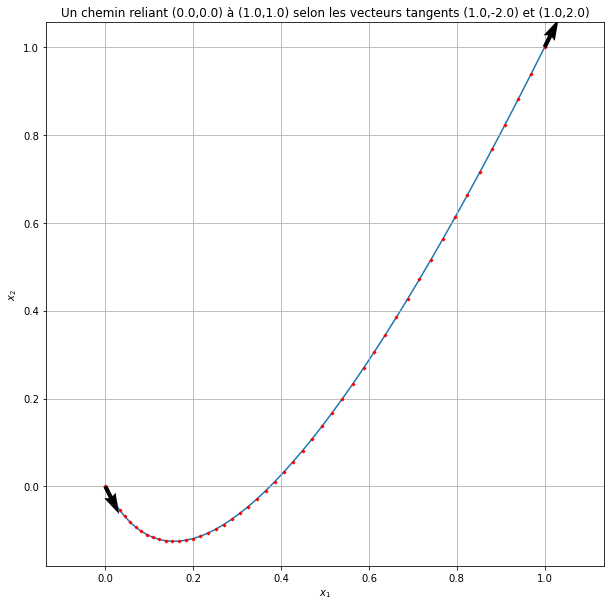

In [18]:
#Cellule de test
def affichage_T6(P1,P2,u1,u2):
    fig, ax = plt.subplots()
    #Tracé des points interpolateurs
    x,y=gamma(np.linspace(0,1,50),P1,P2,u1,u2)
    plt.scatter(x,y,s=4,marker='D',c='r',zorder=2)
    #Tracé de la courbe interpolatrice
    plt.plot(x,y,zorder=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.axis("equal")
    #Tracé des vecteurs tangents
    ax.quiver(P1[0], P1[1], u1[0], u1[1], zorder=3)
    ax.quiver(P2[0], P2[1], u2[0], u2[1], zorder=3)
    plt.title(f"Un chemin reliant ({P1[0]},{P1[1]}) à ({P2[0]},{P2[1]}) selon les vecteurs tangents ({u1[0]},{u1[1]}) et ({u2[0]},{u2[1]})")
    plt.show()
    
affichage_T6(np.array([0.,0.]),np.array([1.,1.]),np.array([1.,-2.]),np.array([1.,2.]))

**Tâche 7**

On propose pour cette tâche deux versions : une première version qui évalue le vecteur tangent en prenant le vecteur orthogonal au gradient en $P_{i}$, calculé par la fonction grad et une seconde qui calcule le vecteur tangent à la courbe en le point $P_{i}$ en utilisant l'approximation $\frac{\overrightarrow{P_{i-1}P_{i+1}}}{2\delta}$.

On peut visualiser leurs performances comparées dans la cellule de test (tâche 8).

In [28]:
def fct_oversampling_grad(f, tab, oversampling=1, delta=0.1):
    """
        si oversampling = 1, la fonction renvoie le tableau tab reçu en argument,
        sinon elle construit un tableau oversampling-1 fois plus grand que tab 
        en ajoutant oversampling-1 points entre chaque point de tab, obtenus en faisant 
        une interpolation avec gamma, le vecteur tangent en P_i étant donné par 
        R(-pi/2)*grad(f)(P_i)
    """
    if oversampling == 1 :
        return tab
    res = np.empty(shape = (2, (len(tab[0])-1) * oversampling))
    #entre chaque paire de points du tableau initial on insère une tranche obtenue par interpolation
    for i in range(len(tab[0])-1):
        t = np.linspace(0, 1, oversampling+1)
        #P_i = (x_i, y_i)
        x_i = tab[:, i][0]
        y_i = tab[:, i][1]
        #P_iplus1 = (x_iplus1, y_iplus1)
        x_iplus1 = tab[:, i+1][0]
        y_iplus1 = tab[:, i+1][1]
        #gradient de f en p_i et p_iplus1
        g_i = grad(f)(x_i, y_i)
        g_iplus1 = grad(f)(x_iplus1, y_iplus1)
        #composition par R(-pi/2) : vecteur tangent "à droite"
        u_1 = (g_i[1],-g_i[0])
        u_2 = (g_iplus1[1],-g_iplus1[0])
        g = gamma(t, tab[:, i], tab[:, i+1], u_1, u_2)[:, :-1]
        #et on insère la tranche qui vient d'être calculée
        res[:, i*(oversampling):(i+1)*oversampling] = g
    return res

def level_curve_finale_grad(f, c, x0, y0, oversampling=1, delta=0.1, nb_points=40, eps=eps):
    """
        intègre un éventuel oversampling au résultat de level_curve_sans_recouvrement, via fct_oversampling
    """
    tab = level_curve_sans_recouvrement(f, c, x0, y0, delta, nb_points, eps)
    return fct_oversampling_grad(f, tab, oversampling, delta)

In [19]:
def fct_oversampling(tab, oversampling=1, delta=0.1):
    """
        si oversampling = 1, la fonction renvoie le tableau tab reçu en argument,
        sinon elle construit un tableau oversampling-1 fois plus grand que tab 
        en ajoutant oversampling-1 points entre chaque point de tab, obtenus en faisant 
        une interpolation avec gamma, le vecteur tangent en P_i étant approché par 
        vect(P_i-1, P_i+1)/2*delta
    """
    if oversampling == 1 :
        return tab
    #calcul du tableau diff des vecteurs tangents approchés en les P_i
    diff = np.roll(tab,-1) - np.roll(tab,1)
    u = diff / (2*delta)
    res = np.empty(shape = (2, (len(tab[0])-1) * oversampling))
    #entre chaque paire de points du tableau initial on insère une tranche obtenue par interpolation
    for i in range(len(tab[0])-1):
        t = np.linspace(0, 1, oversampling+1)
        #on exclut le dernier point car il est également le premier de la tranche suivante
        g = gamma(t, tab[:,i], tab[:,i+1], u[:,i], u[:,i+1])[:, :-1]
        #et on insère la tranche qui vient d'être calculée
        res[:, i*(oversampling):(i+1)*oversampling] = g
    return res

def level_curve_finale(f, c, x0, y0, oversampling=1, delta=0.1, nb_points=40, eps=eps):
    """
        intègre un éventuel oversampling au résultat de level_curve_sans_recouvrement, via fct_oversampling
    """
    tab = level_curve_sans_recouvrement(f, c, x0, y0, delta, nb_points, eps)
    return fct_oversampling(tab, oversampling, delta)

**Tâche 8**

le parcours de la courbe de niveau s'est arrêté car on avait atteint un recouvrement


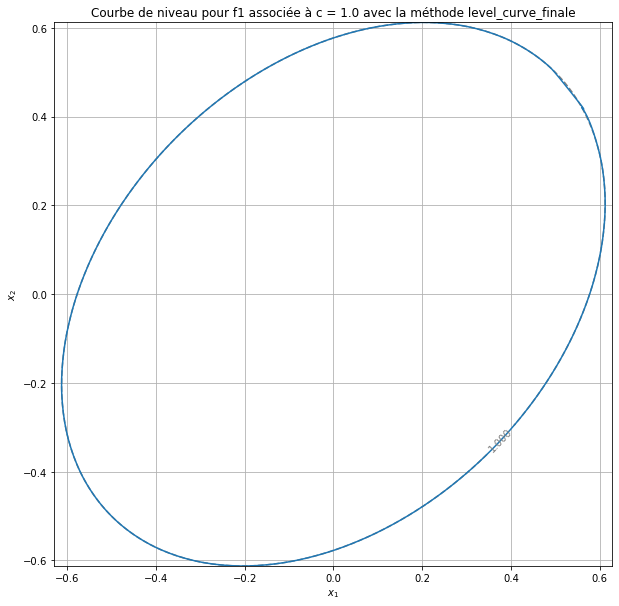

le parcours de la courbe de niveau s'est arrêté car on avait atteint un recouvrement


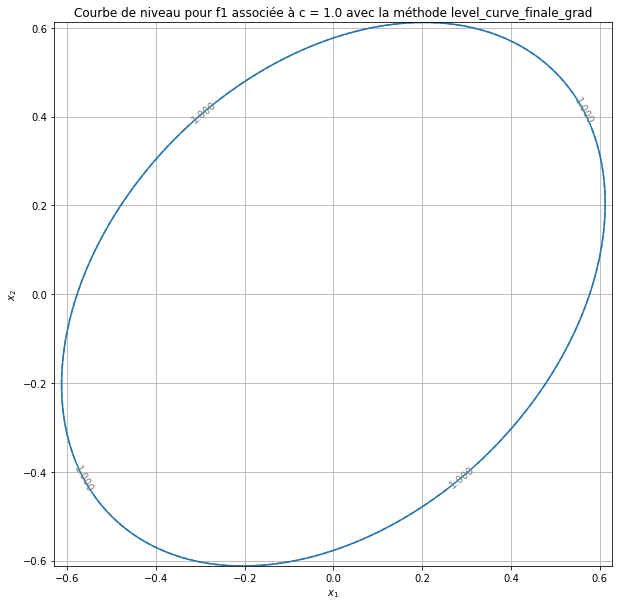

In [29]:
#Cellule de test
def affichage_T7(methode, f, c, x0, y0, oversampling):
    '''methode : level_curve_finale ou level_curve_finale_grad'''
    x, y = methode(f, c, x0, y0, oversampling)
    xmin,xmax=np.min(x),np.max(x)
    ymin,ymax=np.min(y),np.max(y)
    display_contour(f, x = np.linspace(xmin, xmax, 100), y = np.linspace(ymin, ymax, 100), levels = [c])
    plt.plot(x,y)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.axis("equal")
    plt.title(f"Courbe de niveau pour {f.__name__} associée à c = {c} avec la méthode {methode.__name__}")
    plt.show()

affichage_T7(level_curve_finale_grad, f1, 1., 0.5, 0.5, 10)
affichage_T7(level_curve_finale, f1, 1., 0.5, 0.5, 10)